# Clustering Toronto neighborhood data
capstone / week 3

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

This is a list of postal codes in Canada where the first letter is M. Postal codes beginning with M are located within the city of Toronto in the province of Ontario. Only the first three characters are listed, corresponding to the Forward Sortation Area.

In [4]:
#wikipedia
url_html = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

# ---------------- QUESTION 1: Scrapping webpage for Toronto -------------------------------------------

In [5]:
dfs = pd.read_html(url_html)
len(dfs)
toronto_neighbourhoods = dfs[0]
toronto_neighbourhoods.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [8]:
toronto_neighbourhoods.describe()

,Postcode,Borough,Neighbourhood
count,287,287,287
unique,180,12,208
top,M8Y,Not assigned,Not assigned
freq,8,77,78


In [9]:
toronto_neighbourhoods.replace(np.nan, "Not assigned", inplace=True)
toronto_neighbourhoods.columns

Index(['Postcode', 'Borough', 'Neighbourhood'], dtype='object')

In [10]:
# primary shape of the dataset
toronto_neighbourhoods.shape

(287, 3)

In [74]:
toronto_neighbourhoods

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Queen's Park,Not assigned
8,M8A,Not assigned,Not assigned
9,M9A,Downtown Toronto,Queen's Park


## Cleaning/preparing the data for Toronto

In [11]:
# remove the 'Not assigned' rows
df = toronto_neighbourhoods
toronto_df = df[ (df['Borough'] != 'Not assigned')]
toronto_df.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


In [12]:
# group the Neighbourhood by Postcode
df_joined_neighbourhood = toronto_df.groupby('Postcode').Neighbourhood.agg( [('Neighbourhood', ','.join) ])
df_joined_neighbourhood.reset_index(inplace=True)
df_joined = pd.merge(df_joined_neighbourhood, toronto_df[['Postcode','Borough']], on='Postcode')
df_joined.drop_duplicates(inplace=True)
df_joined.head()

,Postcode,Neighbourhood,Borough
0,M1B,"Rouge,Malvern",Scarborough
2,M1C,"Highland Creek,Rouge Hill,Port Union",Scarborough
5,M1E,"Guildwood,Morningside,West Hill",Scarborough
8,M1G,Woburn,Scarborough
9,M1H,Cedarbrae,Scarborough


In [13]:
# update "Not assigned" Neighbourhood with the Borough
df_joined['Neighbourhood'].replace('Not assigned', df_joined['Borough'],inplace=True)
# verify that there is no more 'Not assigned'
df_joined[ (df_joined['Neighbourhood'] == 'Not assigned') | (df_joined['Borough'] == 'Not assigned')] 

,Postcode,Neighbourhood,Borough


## Final Toronto data set content and shape

In [14]:
df_joined.head()

,Postcode,Neighbourhood,Borough
0,M1B,"Rouge,Malvern",Scarborough
2,M1C,"Highland Creek,Rouge Hill,Port Union",Scarborough
5,M1E,"Guildwood,Morningside,West Hill",Scarborough
8,M1G,Woburn,Scarborough
9,M1H,Cedarbrae,Scarborough


In [15]:
df_toronto_neigh = df_joined
df_toronto_neigh.shape

(103, 3)

# ------------- QUESTION 2: latitude and the longitude coordinates of each neighborhood --------

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood. 

In [16]:
url_ll = 'http://cocl.us/Geospatial_data'
df_ll = pd.read_csv(url_ll)
df_ll.rename({'Postal Code':'Postcode'}, axis='columns', inplace=True)
df_ll.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Toronto postal codes with latitude and longitude

In [17]:
df_neigh_ll = pd.merge(df_toronto_neigh, df_ll, on='Postcode')
df_neigh_ll.head()

,Postcode,Neighbourhood,Borough,Latitude,Longitude
0,M1B,"Rouge,Malvern",Scarborough,43.806686,-79.194353
1,M1C,"Highland Creek,Rouge Hill,Port Union",Scarborough,43.784535,-79.160497
2,M1E,"Guildwood,Morningside,West Hill",Scarborough,43.763573,-79.188711
3,M1G,Woburn,Scarborough,43.770992,-79.216917
4,M1H,Cedarbrae,Scarborough,43.773136,-79.239476


In [18]:
# verify that there is no empty Lat and Long and that the join went well.
df_neigh_ll.dropna().shape 

(103, 5)

In [19]:
df_neigh_ll['Borough'].value_counts()

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           11
Central Toronto      9
West Toronto         6
East York            5
York                 5
East Toronto         5
Mississauga          1
Queen's Park         1
Name: Borough, dtype: int64

# ------------- QUESTION 3:Explore and cluster the neighborhoods in Toronto.  ----------------------

Explore and cluster the neighborhoods in Toronto. 
You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you. 
Just make sure:
- to add enough Markdown cells to explain what you decided to do and to report any observations you make.
- to generate maps to visualize your neighborhoods and how they cluster together. 

### Filter on Toronto downton city only

In [20]:
toronto_data = df_neigh_ll [ df_neigh_ll['Borough'].str.contains('Toronto')]
toronto_data.head()

,Postcode,Neighbourhood,Borough,Latitude,Longitude
37,M4E,The Beaches,East Toronto,43.676357,-79.293031
41,M4K,"The Danforth West,Riverdale",East Toronto,43.679557,-79.352188
42,M4L,"The Beaches West,India Bazaar",East Toronto,43.668999,-79.315572
43,M4M,Studio District,East Toronto,43.659526,-79.340923
44,M4N,Lawrence Park,Central Toronto,43.728020,-79.388790


Let's create a function to repeat the same process to all the neighborhoods in Toronto

### call 4Square API to get venues

In [104]:
# foursquare crendentials
CLIENT_ID = 'JMXA0VAYNSTYQ5NHWZGRB1GOUI0QEEWVEOD5YZFDU1ZVJL5O' # your Foursquare ID
CLIENT_SECRET = 'KV2YRAJYADPIFDDBK5AWDE41F1OJAEA5EDMKTQL23GU0AXW2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 400 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called toronto_venues.

In [105]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth West,Riverdale
The Beaches West,India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park,Summerhill East
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
Rosedale
Cabbagetown,St. James Town
Church and Wellesley
Harbourfront
Ryerson,Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide,King,Richmond
Harbourfront East,Toronto Islands,Union Station
Design Exchange,Toronto Dominion Centre
Commerce Court,Victoria Hotel
Roselawn
Forest Hill North,Forest Hill West
The Annex,North Midtown,Yorkville
Harbord,University of Toronto
Chinatown,Grange Park,Kensington Market
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place,Underground city
Christie
Dovercourt Village,Dufferin
Little Portugal,Trinity
Brockton,Exhibition Place,Parkdale Village
High Park,The Junction South
Parkdale,Roncesvalles
Runnymede

In [106]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West,Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [107]:
# get the number of venues in Toronto
print(toronto_venues.shape)

(1687, 7)


In [108]:
# how many venues per neighboorhood
toronto_venues.groupby('Neighborhood')['Venue Category'].count().head()

Neighborhood
Adelaide,King,Richmond                                                                                  100
Berczy Park                                                                                              56
Brockton,Exhibition Place,Parkdale Village                                                               23
Business Reply Mail Processing Centre 969 Eastern                                                        17
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara     14
Name: Venue Category, dtype: int64

In [109]:
print('There are {} uniques venue categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 236 uniques venue categories.


### Get line for each venue and its category as dummy columns

In [110]:
# one hot encoding for each category
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['YNeighborhood'] = toronto_venues['Neighborhood'] 

toronto_onehot.columns[-1]

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_onehot.rename(columns={'YNeighborhood': 'TheNeighborhood'}, inplace=True)

toronto_onehot.head()

,TheNeighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Festival,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [111]:
toronto_onehot.shape

(1687, 237)

In [112]:
# move to one line per neighborhood with all the venue types and amount (mean)
toronto_grouped = toronto_onehot.groupby('TheNeighborhood').mean().reset_index()
toronto_grouped.head()

,TheNeighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Festival,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,"Adelaide,King,Richmond",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.0,0.0,0.0,0.010000,0.0,0.03,0.0,0.000000,0.000000,0.0,0.000000,0.030000,0.0,0.030000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.01,0.000000,0.01,0.010000,0.000000,0.0,0.01,0.03,0.010000,0.0,0.000000,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.070000,0.0,0.0,0.0,0.01,0.000000,0.000000,0.020000,0.000000,0.02,0.0,0.000000,0.0,0.01,0.0,0.01,0.01,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.01,0.0,0.000000

In [113]:
toronto_grouped.shape

(38, 237)

In [114]:
# Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in toronto_grouped['TheNeighborhood'].head():
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['TheNeighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
              venue  freq
0       Coffee Shop  0.07
1              Café  0.05
2        Steakhouse  0.04
3   Thai Restaurant  0.04
4  Asian Restaurant  0.03


----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.04
2  Seafood Restaurant  0.04
3          Steakhouse  0.04
4         Cheese Shop  0.04


----Brockton,Exhibition Place,Parkdale Village----
                   venue  freq
0  Performing Arts Venue  0.09
1                 Bakery  0.09
2         Breakfast Spot  0.09
3                   Café  0.09
4            Coffee Shop  0.09


----Business Reply Mail Processing Centre 969 Eastern----
                venue  freq
0  Light Rail Station  0.12
1             Brewery  0.06
2                 Spa  0.06
3       Garden Center  0.06
4          Smoke Shop  0.06


----CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara----
              venue  freq
0    Airport Lounge

### Build/display the top 10 venues for each neighborhood of Toronto.

In [115]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [135]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['TheNeighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['TheNeighborhood'] = toronto_grouped['TheNeighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,TheNeighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Café,Thai Restaurant,Steakhouse,Salad Place,Asian Restaurant,Burger Joint,Restaurant,Bar,Bakery
1,Berczy Park,Coffee Shop,Seafood Restaurant,Café,Cocktail Bar,Cheese Shop,Bakery,Steakhouse,Beer Bar,Farmers Market,Clothing Store
2,"Brockton,Exhibition Place,Parkdale Village",Breakfast Spot,Performing Arts Venue,Café,Coffee Shop,Bakery,Furniture / Home Store,Convenience Store,Burrito Place,Sandwich Place,Restaurant
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Auto Workshop,Park,Pizza Place,Restaurant,Burrito Place,Brewery,Skate Park,Farmers Market,Smoke Shop
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Lounge,Airport Service,Airport Terminal,Harbor / Marina,Boat or Ferry,Coffee Shop,Plane,Sculpture Garden,Boutique,Airport Food Court


### Cluster Neighborhoods with k-mean modeling of downtown Toronto only

In [136]:
# drop the first column as it is useless for the clustering
toronto_grouped_clustering = toronto_grouped.drop('TheNeighborhood', 1)

In [137]:
# 
# find the best k (number of clusters) regarding the inertia_ score
#
Ks = 20 # number of ks we will test
inertias = np.zeros((Ks-1))
for n in range(1,Ks):
    
    # run k-means clustering
    kmeans = KMeans(n_clusters=n, random_state=0, n_init = 12).fit(toronto_grouped_clustering)
    inertias[n-1] = kmeans.inertia_

inertias

array([3.68905751, 2.70152592, 2.16869356, 1.68187026, 1.43176426,
       1.25954204, 1.1262087 , 1.02026232, 0.95496756, 0.88700555,
       0.78745604, 0.70995237, 0.66888737, 0.60014567, 0.5441409 ,
       0.48194199, 0.43144774, 0.37549996, 0.3513837 ])

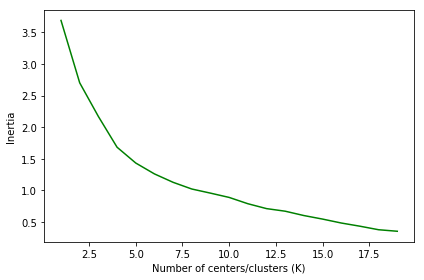

In [138]:
# 
# plot the inertia with the different k to find the better balance
#
plt.plot(range(1,Ks),inertias,'g')
plt.ylabel('Inertia ')
plt.xlabel('Number of centers/clusters (K)')
plt.tight_layout()
plt.show()

In [139]:
# I decide to choose 7 as it is a good balance between clutering reability and inertia score
kmeans = KMeans(n_clusters=7, random_state=0, n_init = 12).fit(toronto_grouped_clustering)
kmeans.labels_[0:40] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       6, 0, 1, 0, 0, 5, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0], dtype=int32)

In [140]:
# Display the information on the centers
print("number of clusters:", len(kmeans.cluster_centers_))
#print("cluster center:" , kmeans.cluster_centers_)
print("number of iterations:", kmeans.n_iter_)
print("inertia (Sum of squared distances of samples to cluster center): ", kmeans.inertia_)

number of clusters: 7
number of iterations: 3
inertia (Sum of squared distances of samples to cluster center):  1.1262087041468576


Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood AND the latitude and longiture to be able to put them on the map.

In [141]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.astype({'Cluster Labels':'int32'},copy=False)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.merge(neighborhoods_venues_sorted.set_index('TheNeighborhood'), how='left', right_on='TheNeighborhood', left_on='Neighbourhood')

In [142]:
# drop "queen's park" as there is no venue as far as I can see
toronto_merged = toronto_merged[ toronto_merged['Neighbourhood'] != "Queen\'s Park"]
toronto_merged

,Postcode,Neighbourhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,The Beaches,East Toronto,43.676357,-79.293031,4.0,Neighborhood,Health Food Store,Pub,Trail,Yoga Studio,Donut Shop,Discount Store,Dog Run,Doner Restaurant,Eastern European Restaurant
1,M4K,"The Danforth West,Riverdale",East Toronto,43.679557,-79.352188,0.0,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Bookstore,Furniture / Home Store,Restaurant,Brewery,Bubble Tea Shop,Caribbean Restaurant
2,M4L,"The Beaches West,India Bazaar",East Toronto,43.668999,-79.315572,0.0,Sandwich Place,Park,Sushi Restaurant,Pub,Liquor Store,Burger Joint,Burrito Place,Board Shop,Fast Food Restaurant,Fish & Chips Shop
3,M4M,Studio District,East Toronto,43.659526,-79.340923,0.0,Café,Coffee Shop,Italian Restaurant,Bakery,American Restaurant,Yoga Studio,Fish Market,Bookstore,Coworking Space,Seafood Restaurant
4,M4N,Lawrence Park,Central Toronto,43.728020,-79.388790,6.0,Park,Bus Line,Swim School,Yoga Studio,Discount Store,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store
5,M4P,Davisville North,Central Toronto,43.712751,-79.390197,0.0,Gym,Hotel,Convenience Store,Clothing Store,Dance Studio,Sandwich Place,Breakfast Spot,Food & Drink Shop,Asian Restaurant,Park
6,M4R,North Toronto West,Central Toronto,43.715383,-79.405678,0.0,Clothing Store,Coffee Shop,Sporting Goods Shop,Dessert Shop,Mexican Restaurant,Miscellaneous Shop,Diner,Park,Bagel Shop,Chinese Restaurant
7,M4S,Davisville,Central Toronto,43.704324,-79.388790,0.0,Sandwich Place,Dessert Shop,Sushi Restaurant,Gym,Coffee Shop,Toy / Game Store,Italian Restaurant,Café,Pizza Place,Fried Chicken Joint
8,M4T,"Moore Park,Summerhill East",Central Toronto,43.689574,-79.383160,1.0,Gym,Playground,Yoga Studio,Dim Sum Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
9,M4V,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",Central Toronto,43.686412,-79.400049,0.0,Pub,Coffee Shop,Pizza Place,Liquor Store,Sports Bar,Restaurant,Supermarket,Bagel Shop,Sushi Restaurant,Fried Chicken Joint


In [143]:
# display the number of borough per cluster
toronto_merged['Cluster Labels'].value_counts()

0.0    32
2.0     1
3.0     1
5.0     1
1.0     1
6.0     1
4.0     1
Name: Cluster Labels, dtype: int64

### Visualize cluster on the map

In [144]:
address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of toronto are 43.653963, -79.387207.


In [151]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(len(toronto_merged['Cluster Labels'].value_counts()))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
count=0

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + '/ Cluster is ' + str(cluster), parse_html=True)  
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Assign a name or a flavor to each cluster

### Cluster 1

In [84]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"The Danforth West,Riverdale",0.0,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Bookstore,Furniture / Home Store,Restaurant,Brewery,Bubble Tea Shop,Caribbean Restaurant
2,"The Beaches West,India Bazaar",0.0,Sandwich Place,Park,Sushi Restaurant,Pub,Liquor Store,Burger Joint,Burrito Place,Board Shop,Fast Food Restaurant,Fish & Chips Shop
3,Studio District,0.0,Café,Coffee Shop,Italian Restaurant,Bakery,American Restaurant,Yoga Studio,Fish Market,Bookstore,Coworking Space,Seafood Restaurant
5,Davisville North,0.0,Gym,Hotel,Convenience Store,Clothing Store,Dance Studio,Sandwich Place,Breakfast Spot,Food & Drink Shop,Asian Restaurant,Park
6,North Toronto West,0.0,Clothing Store,Coffee Shop,Sporting Goods Shop,Dessert Shop,Mexican Restaurant,Miscellaneous Shop,Diner,Park,Bagel Shop,Chinese Restaurant
7,Davisville,0.0,Sandwich Place,Dessert Shop,Sushi Restaurant,Gym,Coffee Shop,Toy / Game Store,Italian Restaurant,Café,Pizza Place,Fried Chicken Joint
9,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",0.0,Pub,Coffee Shop,Pizza Place,Liquor Store,Sports Bar,Restaurant,Supermarket,Bagel Shop,Sushi Restaurant,Fried Chicken Joint
11,"Cabbagetown,St. James Town",0.0,Coffee Shop,Park,Restaurant,Café,Pub,Italian Restaurant,Bakery,Pizza Place,Sandwich Place,Butcher
12,Church and Wellesley,0.0,Sushi Restaurant,Coffee Shop,Gay Bar,Japanese Restaurant,Restaurant,Gastropub,Pub,Bubble Tea Shop,Men's Store,Café
13,Harbourfront,0.0,Coffee Shop,Bakery,Pub,Park,Restaurant,Café,Mexican Restaurant,Breakfast Spot,Theater,Spa


### Cluster 2

In [85]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Roselawn,1.0,Garden,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


### Cluster 3

In [86]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Lawrence Park,2.0,Park,Bus Line,Swim School,Yoga Studio,Discount Store,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store


### Cluster 4

In [87]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,"Moore Park,Summerhill East",3.0,Gym,Playground,Yoga Studio,Dim Sum Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


### Cluster 5

In [88]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,The Beaches,4.0,Neighborhood,Health Food Store,Pub,Trail,Yoga Studio,Donut Shop,Discount Store,Dog Run,Doner Restaurant,Eastern European Restaurant


In [ ]:
### Cluster 6

In [89]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Rosedale,5.0,Park,Playground,Trail,Yoga Studio,Dim Sum Restaurant,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
